The intensity distribution for the diffraction field of a focused Gaussian beam through a finite circular aperture is given by



$
I(r,z) = \frac{P \alpha^2}{Z^2} \Bigg[ 
\bigg[ \int_0^1 r_0 J_0 \big( \frac{P\alpha R}{Z}r_0 \big) \exp \big( -\frac{\alpha^2 r_0^2}{1 + \xi_0^2} \big) \cos(s_1 r_0^2) \text{d}r_0 \bigg]^2 + \bigg[ \int_0^1 r_0 J_0 \big( \frac{P\alpha R}{Z}r_0 \big) \exp \big( -\frac{\alpha^2 r_0^2}{1 + \xi_0^2} \big) \sin(s_1 r_0^2) \text{d}r_0 \bigg]^2
\Bigg]
$


I incorporated this in my program gaussian_beam_propagation.py. In this notebook I demonstrate how to use the module to view the theoretical intensity distribution.

In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as pl
import matplotlib.style as mplstyle
import seaborn as sns
import gaussian_beam_propagation as gbp

mplstyle.use('seaborn')
sns.set_style("darkgrid", {'axes.grid' : False})
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.cubehelix_palette(100, start=.5, rot=-.75, reverse=True))

In [2]:
def plots(X, Z, intensity, alpha):
    fig, ax = pl.subplots(1, 3, sharey=False)

#     ax[0].imshow(intensity)
#     ax[0].colorbar()
#     ax[1].imshow(np.log(intensity))
#     ax[1].colorbar()
    ax[0].plot(intensity[intensity.shape[0]//2, :])
    ax[1].plot(intensity[:, intensity.shape[1]//2])
    ax[2].contour(intensity, levels=np.logspace(-4,1, 20), cmap=pl.cm.gray, linewidths=0.5)
#     ax[2].axis('equal')
#     ax[2].set_xlim(0, 300)
#     ax[2].set_ylim(0, 300)
#     pl.savefig(f'diff-{alpha}.png', dpi=300)

In [53]:
def plots2(X, Z, intensity, alpha):
    fig = pl.figure()

    ax1 = pl.subplot2grid((3, 5), (0, 0), colspan=4)
    ax3 = pl.subplot2grid((3, 5), (1, 0), colspan=4, rowspan=2)
    ax4 = pl.subplot2grid((3, 5), (1, 4), rowspan=2)

    extent = (X[0, 0], X[0, -1], Z[0, 0], Z[-1, 0])
    ax4.plot(intensity[:, intensity.shape[1]//2], Z[:, 0])
    ax4.set_xlabel(r'$I_{(u=0)} / I_0$')
#     ax4.set_ylabel(r'$v$ (rad), $u$ = 0')
    ax4.set_yticklabels([])
    ax1.plot(X[0], intensity[intensity.shape[0]//2, :])
    ax1.set_ylabel(r'$I_{(v=0)} / I_0$')
    ax1.set_xticklabels([])
#     ax1.set_xlabel(r'$u$ (rad), $v$ = 0')
    ax3.contour(intensity, levels=np.logspace(-4,1, 20), cmap=pl.cm.gray, linewidths=0.5, extent=extent)
    ax3.imshow(np.log(intensity), cmap=cmap, extent=extent)
    ax3.set_ylabel(r'$v$ (rad)')
    ax3.set_xlabel(r'$u$ (rad)')
    ax3.text(22, 10, r'$\alpha$ = ' + f'{int(alpha)}', bbox={'facecolor': 'white', 'pad': 10, 'edgecolor':'none'})
#     ax1.set_title(f'Truncation coefficient: {int(alpha)}')
    pl.tight_layout()
    pl.savefig(f'lommelfocused-{alpha}.png', dpi=300)

In [4]:
# create the beam objects
beams = []
for trunc_coeff in np.arange(0, 10, 1):
    beam = gbp.FocusedGaussianBeam(NA=0.4, n=1.33, trunc_coeff=trunc_coeff)
    beams.append(beam)

/Users/hannaharjonillo/Research/gbp_mc/gaussian_beam_propagation.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  self.w_incident = self.aperture / np.sqrt(trunc_coeff)


/Users/hannaharjonillo/Research/gbp_mc/gaussian_beam_propagation.py:135: RuntimeWarning: divide by zero encountered in true_divide
  s1 = (P * alpha**2 * (1-Z) / (2*Z)) + (alpha**2 * eps / (1 + eps**2))
/Users/hannaharjonillo/Research/gbp_mc/gaussian_beam_propagation.py:138: RuntimeWarning: invalid value encountered in multiply
  f1 = P**2 * alpha**4 / (4 * Z**2 * (s1**2 + s2**2))
/Users/hannaharjonillo/Research/gbp_mc/gaussian_beam_propagation.py:139: RuntimeWarning: invalid value encountered in cos
  f2 = 1 + expit(2*s2) - 2*expit(s2)*np.cos(s1)


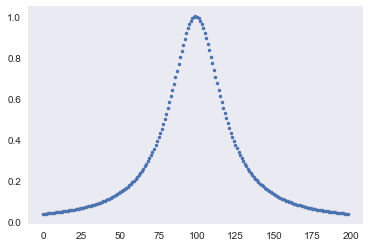

In [5]:
z = np.linspace(-30, 30, 199)
pl.plot(beams[4].axial_intensity(z), '.')

In [28]:
intensities = []
for beam in beams:
    u = np.linspace(-30, 30, 200, dtype=np.float64)
    v = np.linspace(-15, 15, 100, dtype=np.float64)
    
    V, U, field = beam.debye_approx_field(v, u)
    intensity = np.array(np.abs(field)**2, dtype=np.float64)
    intensity = intensity / np.amax(intensity)
    
    
#     print(np.isinf(intensity))
    intensities.append(intensity / np.amax(intensity))


2.575757575757578
-2.878787878787879
3.1818181818181834
-3.787878787878787
-4.09090909090909
-4.3939393939393945
-5.0
-5.303030303030303
-5.6060606060606055
-5.909090909090908


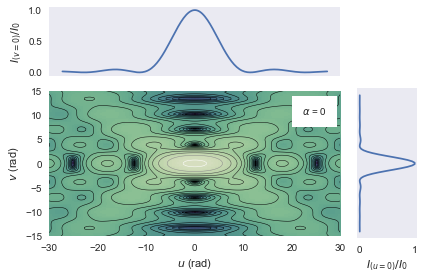

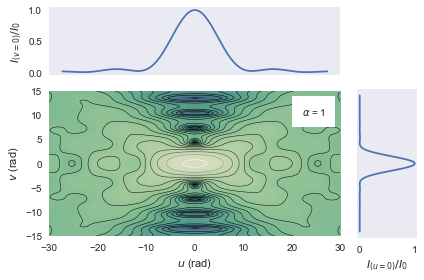

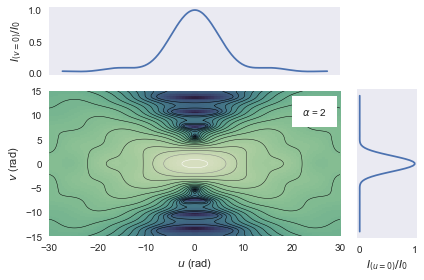

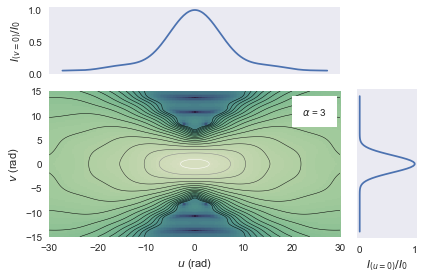

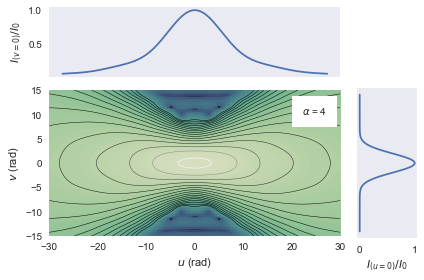

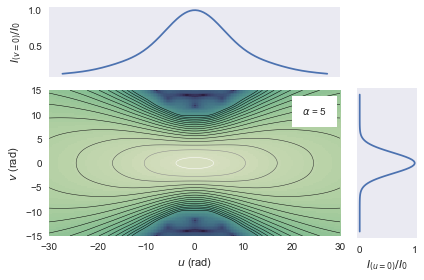

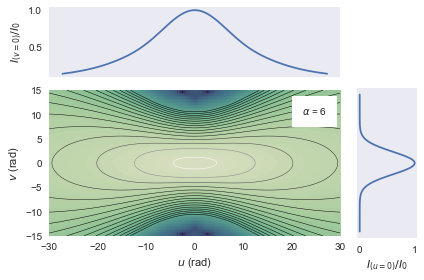

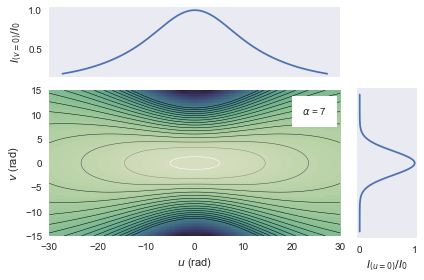

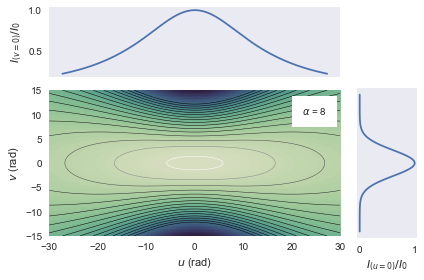

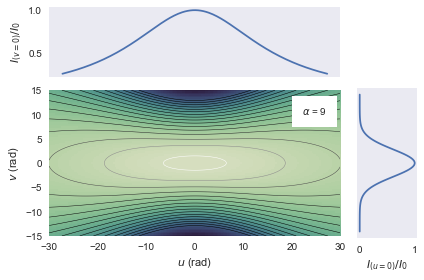

In [54]:
i = 0
for beam in beams:
    intensity = intensities[i]
    plots2(U, V, intensity, beam.trunc_coeff)    
    diff = np.abs(intensity[:, intensity.shape[1]//2]-(1/np.e**2))
    beamwaistloc = np.argmin(diff)
    print(v[beamwaistloc])
    i += 1

In [8]:
for i in range(len(intensities)):
    x = np.linspace(-20, 20, 100)
    z = np.linspace(beam.z_f - 20, beam.z_f + 20, 100)
    X, Z = np.meshgrid(x, z)
    plots(Z, X, intensities[i])

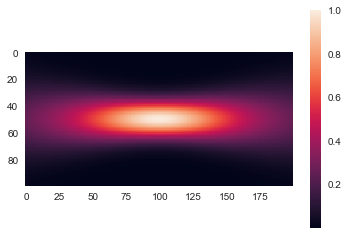

In [9]:
pl.imshow(intensity)
pl.colorbar()

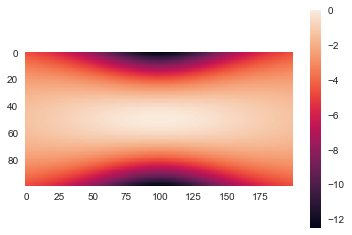

In [10]:
pl.imshow(np.log(intensity))
pl.colorbar()

In [11]:
fig = pl.figure(figsize=(5, 5))
# pl.contourf(X, Z, intensity, levels=np.logspace(-6, np.amax(intensity), 3), cmap=pl.cm.hot, origin='lower')
pl.contour(Z, X, intensity.T, levels=np.logspace(-6, np.amax(intensity), 20), cmap=pl.cm.gray, origin='lower', linewidths=0.5)
pl.ylabel(r'$x$ ($\mu$ m)')
pl.xlabel(r'$z$ ($\mu$ m)')

NameError: name 'Z' is not defined

<Figure size 360x360 with 0 Axes>

In [ ]:
# get the profiles
plane_x0 = intensity.shape[0]//2
plane_z0 = intensity.shape[1]//2
axial = intensity[plane_x0, :]
pl.plot(z, axial)

In [ ]:
transverse = intensity[:, plane_z0]
pl.plot(x, transverse)
# show beam radius
pl.axvline(x=beam.__dict__['w0'], alpha=0.5)
pl.axvline(x=-beam.__dict__['w0'], alpha=0.5)

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.cos(x)
u = x / 3
v = np.cos(u)

pl.plot(u,v)
pl.plot(x,y, alpha=0.5)